# Importing libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading and looking at data on Boston house prices

In [34]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()
print(boston_dataset.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [35]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [36]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
boston['MEDV'] = boston_dataset.target

# The .head() function helps us look at the first few rows of the dataset

In [38]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Let's see if there are any patterns in the data.
For example, for a higher RM (average number of rooms per dwelling), we would expect to observe a higher MEDV (price).
This is because more rooms would imply more space, thereby costing more, taking all other factors constant.

Another example is LSTAT (which is the percentage of lower class citizens). As LSTAT increases, we would expect to observe a lower MEDV (price).

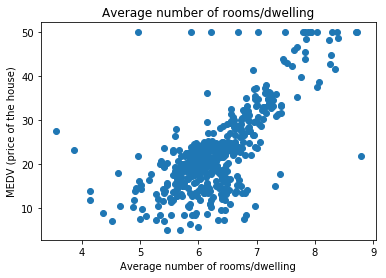

In [39]:
plt.plot(boston['RM'], boston['MEDV'], 'o')
plt.title('Average number of rooms/dwelling')
plt.xlabel('Average number of rooms/dwelling')
plt.ylabel('MEDV (price of the house)')

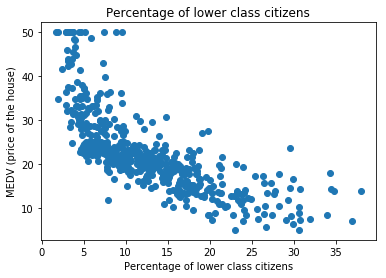

In [40]:
plt.plot(boston['LSTAT'], boston['MEDV'], 'o')
plt.title('Percentage of lower class citizens')
plt.xlabel('Percentage of lower class citizens')
plt.ylabel('MEDV (price of the house)')

# Now let's analyze the data so that we can predict the prices of new houses

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the MEDV column.

In [41]:
X = boston[['RM', 'LSTAT']]
y = boston['MEDV']

# Train Test Split
Now let's split the data into a training set and a testing set. We will train our model on the training set and then use the test set to evaluate the model.

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

# Creating and Training the Linear Regression Model

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# How can we determine if our model is good or not?

In [44]:
predictions = lm.predict(X_test)

# Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

Mean Squared Error (MSE) is the mean of the squared errors:
 
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
 
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [45]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.49535683706
MSE: 38.9219066046
RMSE: 6.23874238967


# Now that you have learned how to create models and evaluate them, you can analyze other datasets using the same techniques!
Imagine you are working at a hospital and are tasked with predicting whether a patient will have breast cancer. To do this, you will be analyzing a dataset about Wisconsin breast cancer patients. Fill in the empty lines with code to achieve this task.

In [46]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()
print(breast_cancer_dataset.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [47]:
breastcancer = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
breastcancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [48]:
breastcancer['Diagnosis'] = breast_cancer_dataset.target

# Write a line of code to look at the first few rows of the dataset

# Write lines of code to graph the data and see if there are any patterns in the data.

# Now let's analyze the data so that we can diagnose breast cancer for new patients

Let's now begin to train our regression model! Write a line of code to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Diagnosis column.

# Train Test Split
Now let's split the data into a training set and a testing set. Write a line of code to create training sets and testing sets.

# Creating and Training the Model
Write lines of code to create a predictive model. In this case, a logistic regression model would work better than a linear regression model. One reason is that the outcomes can either be 0 or 1.

# How can we determine if our model is good or not?
Write lines of code to calculate the metrics (MAE, MSE, RMSE)